# Ejercicio 5.37: Análisis de un Marco Rígido por el Método de Elementos Finitos

En este notebook se resuelve el ejercicio 5.37 del libro "A First Course in the Finite Element Method" de Daryl L. Logan. El objetivo es analizar la estructura de marco rígido mostrada en la figura para determinar los desplazamientos, las fuerzas internas (axiales, cortantes) y los momentos en cada elemento, así como las reacciones en los apoyos.

## Enunciado del Problema

Analice el marco rígido de la figura. Determine los desplazamientos y giros en los nodos, las fuerzas en los elementos y las reacciones. Considere $E = 200 \,GPa$, $A = 4.0 \times 10^{-2}\, m^{2}$ e $I = 4.0\times 10^{-4} m^{4}$ para todos los elementos.


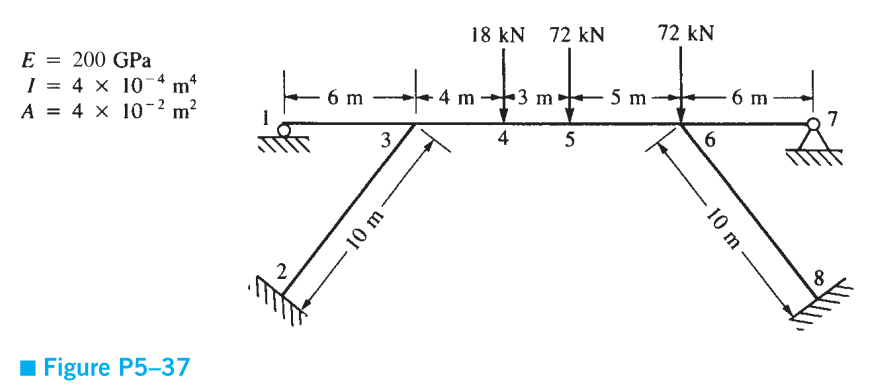

### 1. Preparación del Entorno
 
Se importan las clases necesarias (`Nodo`, `Marco`, `Ensamble`) de la librería personalizada `mnspy` para modelar la estructura.

In [1]:
from mnspy import Nodo, Marco, Ensamble

### 2. Definición del Modelo

#### 2.1. Nodos

Se definen los nodos de la estructura especificando sus coordenadas (x, y) y sus grados de libertad.
- `True`: El desplazamiento o giro en esa dirección es libre.
- `False`: El desplazamiento o giro está restringido.

- **Nodo 1:** Apoyo de rodillo (restringido en Y).
- **Nodo 2:** Empotramiento (restringido en X, Y y rotación Z).
- **Nodos 3, 4, 5, 6:** Nodos libres.
- **Nodo 7:** Apoyo de pasador (restringido en X y Y).
- **Nodo 8:** Empotramiento (restringido en X, Y y rotación Z).

In [2]:
n_1 = Nodo('1', 0.0, 0.0, grados_libertad={'x': True, 'y': False, 'eje_z': True})
n_2 = Nodo('2', 0.0, -8.0, grados_libertad={'x': False, 'y': False, 'eje_z': False})
n_3 = Nodo('3', 6.0, 0.0, grados_libertad={'x': True, 'y': True, 'eje_z': True})
n_4 = Nodo('4', 10.0, 0.0, grados_libertad={'x': True, 'y': True, 'eje_z': True})
n_5 = Nodo('5', 13.0, 0.0, grados_libertad={'x': True, 'y': True, 'eje_z': True})
n_6 = Nodo('6', 18.0, 0.0, grados_libertad={'x': True, 'y': True, 'eje_z': True})
n_7 = Nodo('7', 24.0, 0.0, grados_libertad={'x': False, 'y': False, 'eje_z': True})
n_8 = Nodo('8', 24.0, -8.0, grados_libertad={'x': False, 'y': False, 'eje_z': False})

#### 2.2. Cargas Externas
 
Se aplican las cargas puntuales externas a los nodos correspondientes.

In [3]:
n_4.agregar_fuerza_externa(-18,'y')
n_5.agregar_fuerza_externa(-72,'y')
n_6.agregar_fuerza_externa(-72,'y')

#### 2.3. Elementos (Marcos)

Se definen los elementos tipo marco que conectan los nodos. Para cada elemento se especifica su nombre, nodos de inicio y fin, área de la sección transversal (`A`), módulo de Young (`E`) y momento de inercia (`I`).

In [4]:
e_1 = Marco('1', n_1, n_3, A = 4E-2, E = 200E6, I = 4E-4)
e_2 = Marco('2', n_2, n_3, A = 4E-2, E = 200E6, I = 4E-4)
e_3 = Marco('3', n_3, n_4, A = 4E-2, E = 200E6, I = 4E-4)
e_4 = Marco('4', n_4, n_5, A = 4E-2, E = 200E6, I = 4E-4)
e_5 = Marco('5', n_5, n_6, A = 4E-2, E = 200E6, I = 4E-4)
e_6 = Marco('6', n_6, n_7, A = 4E-2, E = 200E6, I = 4E-4)
e_7 = Marco('7', n_6, n_8, A = 4E-2, E = 200E6, I = 4E-4)

In [5]:
e_1

Marco: 1

In [6]:
e_2

Marco: 2

In [7]:
e_3

Marco: 3

In [8]:
e_4

Marco: 4

In [9]:
e_5

Marco: 5

In [10]:
e_6

Marco: 6

In [11]:
e_7

Marco: 7

### 3. Ensamblaje y Solución del Sistema
Se crea el objeto `Ensamble` que representa la estructura completa, agrupando todos los elementos definidos.

In [12]:
ens = Ensamble([e_1, e_2, e_3, e_4, e_5, e_6, e_7])

Se definen los tipos de soporte para la visualización de diagramas (solo afecta el diagrama, no los cálculos).
- `[0,0]`: Rodillo
- `[0,1]`: Pasador

In [13]:
n_1.set_soporte([0,0])
n_7.set_soporte([0,1])

Se genera un diagrama que muestra la estructura con las cargas y apoyos aplicados para verificar el modelo.

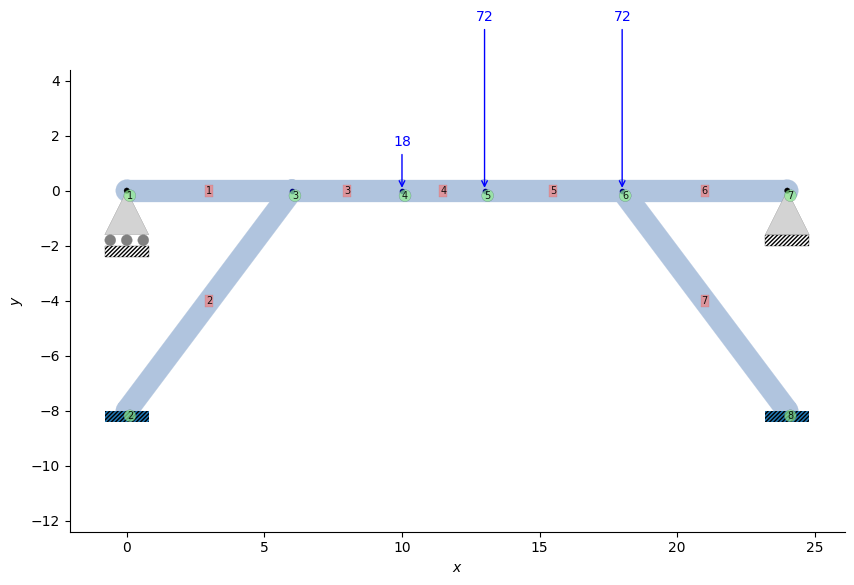

In [14]:
ens.diagrama_cargas()

In [15]:
ens

Se muestra la matriz de rigidez global reducida, considerando solo los grados de libertad no restringidos.

In [16]:
ens.matriz_global_reducida()

<IPython.core.display.Math object>

Se resuelve el sistema de ecuaciones `[K]{d} = {F}` para encontrar el vector de desplazamientos `{d}`. Posteriormente, se calculan las reacciones en los apoyos.

In [17]:
ens.solucionar_por_gauss_y_calcular_reacciones()
ens.solucion()

Desplazamientos,Reacciones
$\color{blue}u_{1}=2.371462129 \times 10^{-5}$,$\cancel{F_{1x}}$
$v_{1}=0$,$\color{blue}F_{1y}=-9.525389239$
$\color{blue}\phi_{1}=0.0006936197549$,$\cancel{M_{1}}$
$\color{blue}u_{3}=2.371462129 \times 10^{-5}$,$\cancel{F_{3x}}$
$\color{blue}v_{3}=-0.0001247066284$,$\cancel{F_{3y}}$
$\color{blue}\phi_{3}=-0.001449592824$,$\cancel{M_{3}}$
$u_{2}=0$,$\color{blue}F_{2x}=46.55193576$
$v_{2}=0$,$\color{blue}F_{2y}=50.62257816$
$\phi_{2}=0$,$\color{blue}M_{2}=-22.74326595$
$\color{blue}u_{4}=4.386534075 \times 10^{-7}$,$\cancel{F_{4x}}$


### 4. Resultados y Visualización

Una vez resuelto el sistema, se procede a graficar los diagramas de fuerzas internas y la deformada de la estructura.

#### 4.1. Diagrama de Fuerza Axial

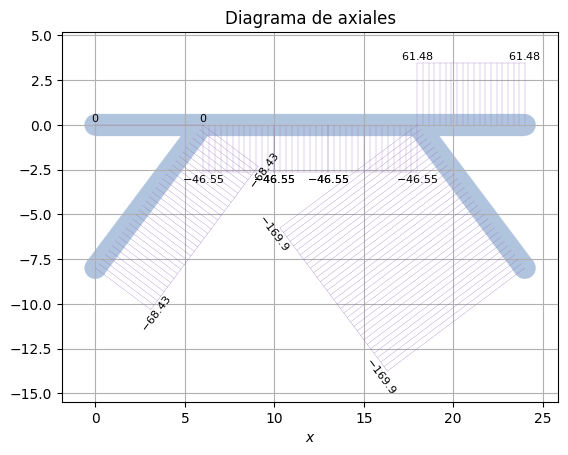

In [18]:
ens.diagrama_de_axial()

#### 4.2. Diagrama de Fuerza Cortante

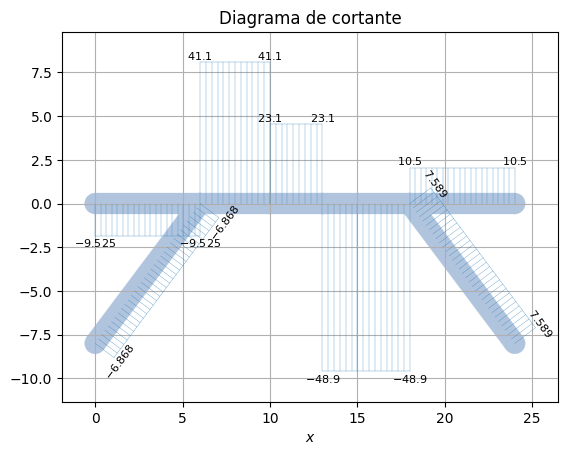

In [19]:
ens.diagrama_de_cortante()

#### 4.3. Diagrama de Momento Flector

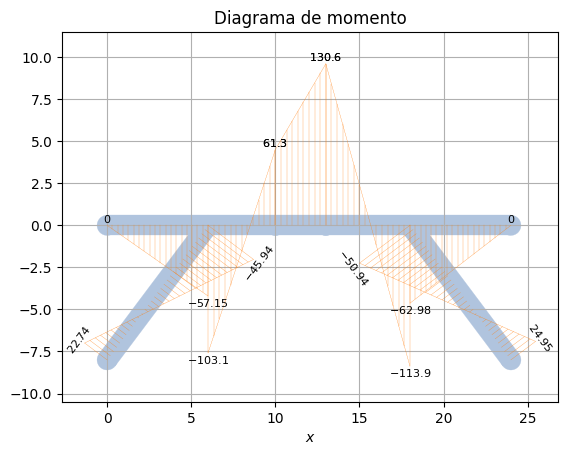

In [20]:
ens.diagrama_de_momento()

#### 4.4. Diagrama de Giro (Pendiente)

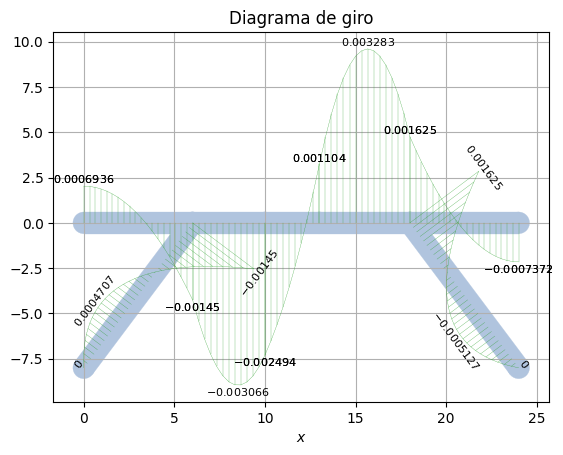

In [21]:
ens.diagrama_de_giro()

#### 4.5. Diagrama de Deflexión

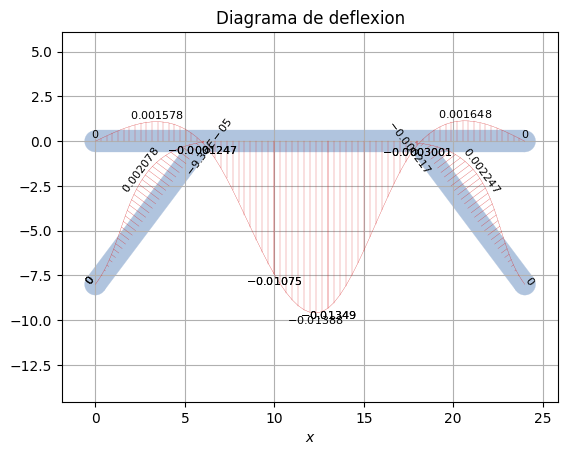

In [22]:
ens.diagrama_de_deflexion()

#### 4.6. Deformada de la Estructura

Se visualiza la forma deformada de la estructura superpuesta a la original, con una magnificación para apreciar los desplazamientos.

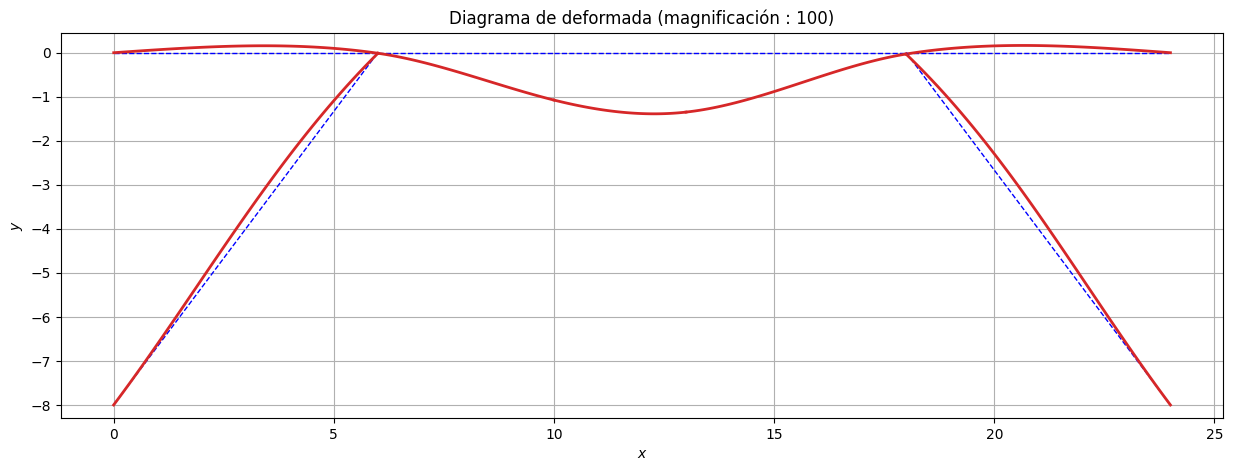

In [23]:
ens.deformada(magnificacion=100)